In [1]:
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
BATCH_SIZE = 32
BUFFER_SIZE = 6000
EPOCHS = 30
latent_dims = 32

mnist = tf.keras.datasets.mnist
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype(np.float32)
train_images /= 255.
train_images = train_images[:BUFFER_SIZE]

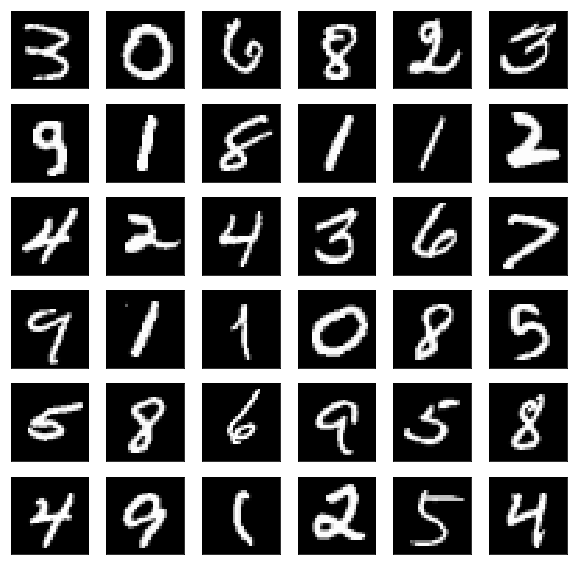

In [3]:
# Plot examples images from the MNIST dataset
plt.figure(figsize=(10,10))
random_inds = np.random.choice(BUFFER_SIZE,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap='gray')

In [4]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential()
        self.encoder.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        self.encoder.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
        self.encoder.add(tf.keras.layers.Flatten())
        self.encoder.add(tf.keras.layers.Dense(latent_dim))

        self.decoder = tf.keras.Sequential()
        self.decoder.add(tf.keras.layers.Dense(7*7*32, activation='relu', input_shape=(latent_dim, )))
        self.decoder.add(tf.keras.layers.Reshape((7, 7, 32)))
        self.decoder.add(tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same'))
        self.decoder.add(tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same'))
        self.decoder.add(tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same'))

    def encode(self, input_image):
        return self.encoder(input_image)
  
    def decode(self, latent_vector):
        return self.decoder(latent_vector)
 
    def call(self, input_image):
        return self.decode(self.encode(input_image))

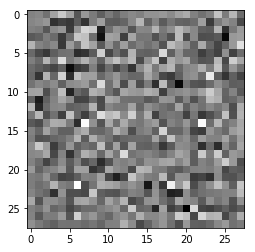

In [5]:
model = AutoEncoder(latent_dims)
model.compile(loss = 'mse', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

out = model.call(train_images[:1])
plt.imshow(np.squeeze(out), cmap='gray') # plot the output of the untrained Autoencoder to make sure it's untrained

In [6]:
model.fit(train_images, train_images, batch_size=BATCH_SIZE, epochs=30, verbose=2)

out = model.call(train_images)

Train on 6000 samples
Epoch 1/30
6000/6000 - 2s - loss: 0.0308 - accuracy: 0.8080
Epoch 2/30
6000/6000 - 1s - loss: 0.0154 - accuracy: 0.8125
Epoch 3/30
6000/6000 - 1s - loss: 0.0129 - accuracy: 0.8130
Epoch 4/30
6000/6000 - 1s - loss: 0.0116 - accuracy: 0.8132
Epoch 5/30
6000/6000 - 1s - loss: 0.0107 - accuracy: 0.8134
Epoch 6/30
6000/6000 - 1s - loss: 0.0101 - accuracy: 0.8135
Epoch 7/30
6000/6000 - 1s - loss: 0.0097 - accuracy: 0.8135
Epoch 8/30
6000/6000 - 1s - loss: 0.0094 - accuracy: 0.8136
Epoch 9/30
6000/6000 - 1s - loss: 0.0091 - accuracy: 0.8136
Epoch 10/30
6000/6000 - 1s - loss: 0.0088 - accuracy: 0.8136
Epoch 11/30
6000/6000 - 1s - loss: 0.0086 - accuracy: 0.8136
Epoch 12/30
6000/6000 - 1s - loss: 0.0085 - accuracy: 0.8137
Epoch 13/30
6000/6000 - 1s - loss: 0.0083 - accuracy: 0.8137
Epoch 14/30
6000/6000 - 1s - loss: 0.0083 - accuracy: 0.8137
Epoch 15/30
6000/6000 - 1s - loss: 0.0081 - accuracy: 0.8137
Epoch 16/30
6000/6000 - 1s - loss: 0.0079 - accuracy: 0.8137
Epoch 17/30

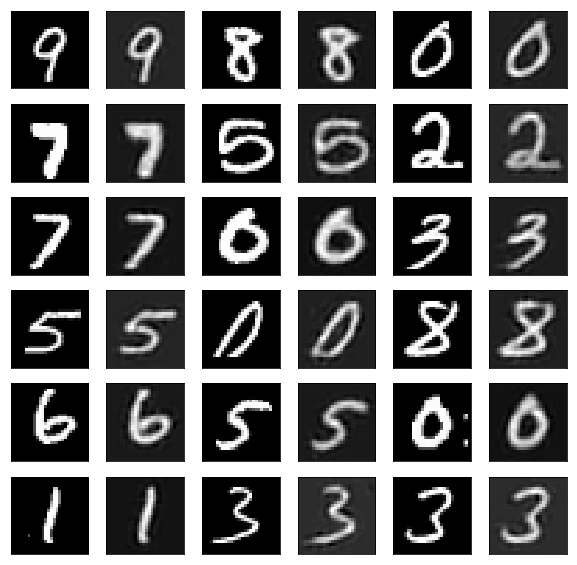

In [7]:
plt.figure(figsize=(10,10))
n_examples = 18
random_inds = np.random.choice(BUFFER_SIZE, n_examples)
for i in range(0, n_examples):
    image_ind = random_inds[i]
    
    plt.subplot(6,6,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(train_images[image_ind]), cmap='gray') # plots ground truth

    plt.subplot(6,6,2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(out[image_ind]), cmap='gray') #plots reconstructed image from the autoencoder output 